In [2]:
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
import numpy as np
import pandas as pd
from tensorflow.keras.utils import to_categorical
from sklearn import linear_model
from sklearn import metrics
import seaborn as sns

#### 1. Importing and Verifying Data

In [3]:
(train_images, train_labels), (test_images, test_labels) = \
tf.keras.datasets.cifar10.load_data()

In [4]:
label_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [5]:
train_labels[0]

array([6], dtype=uint8)

<b> Checking the data

In [6]:
print(train_images.shape)
print(train_labels.shape) 
print(test_images.shape)
print(test_labels.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


<b> Random check of a sample

Text(0.5, 0, 'horse-[7]')

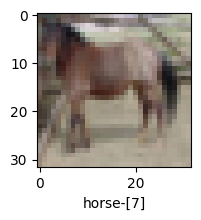

In [7]:
i = np.random.randint(len(train_images))
plt.figure(figsize=(10,2))
plt.imshow(train_images[i])
plt.xlabel(label_names[int(train_labels[i])] + "-" + str(train_labels[i]))

##### Normalizing the image data

In [8]:
x_train = train_images/255
x_test = test_images/255

##### One-hot encoding the label data

In [9]:
y_train_onehot = to_categorical(train_labels)
y_test_onehot = to_categorical(test_labels)

##### Transform the labels array into a simple list for visualization later

In [10]:
y_train = train_labels.reshape(-1,)
y_test = test_labels.reshape(-1,)

In [11]:
print(test_labels.shape)
print(y_test)

(10000, 1)
[3 8 8 ... 5 1 7]


In [12]:
x_train.shape


(50000, 32, 32, 3)

In [13]:
y_train_onehot.shape

(50000, 10)

In [14]:
y_train_onehot[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

#### 4. Design a CNN

##### 4.1. Model architecture

The architecture tested below is inspired by VGG-16 (alternate Conv-MaxPool, 3x3 kernel, stride 1x1 'same' padding) and modified by using drop out layers by the following source: <br>
https://www.analyticsvidhya.com/blog/2020/02/learn-image-classification-cnn-convolutional-neural-networks-3-datasets/

In [15]:
cnn5 = Sequential()

# input layer
cnn5.add(Conv2D(50, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape=(32,32,3)))

# convolutional layer
cnn5.add(Conv2D(64, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
cnn5.add(MaxPool2D(pool_size=(2,2)))
cnn5.add(Dropout(0.2))

cnn5.add(Conv2D(128, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
cnn5.add(MaxPool2D(pool_size=(2,2)))
cnn5.add(Dropout(0.2))

# add another layer
cnn5.add(Conv2D(256, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
cnn5.add(MaxPool2D(pool_size=(2,2)))
cnn5.add(Dropout(0.2))

cnn5.add(Conv2D(256, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
cnn5.add(MaxPool2D(pool_size=(2,2)))
cnn5.add(Dropout(0.2))

# flatten output of conv
cnn5.add(Flatten())

# dense connected layers
cnn5.add(Dense(500, activation='relu'))
cnn5.add(Dropout(0.2))
cnn5.add(Dense(250, activation='relu'))
cnn5.add(Dropout(0.2))
# output layer
cnn5.add(Dense(10, activation='softmax'))

##### 4.2. Model compiling and fitting on training set

In [16]:
cnn5.compile(optimizer='adam', \
                  loss='categorical_crossentropy', \
                  metrics=['accuracy'])

In [18]:
run_cnn5 = cnn5.fit(x_train, y_train_onehot, epochs=5, validation_data=(x_test, y_test_onehot))

Epoch 1/5
1563/1563 [==============================] - 401s 256ms/step - loss: 1.5716 - accuracy: 0.4128 - val_loss: 1.2717 - val_accuracy: 0.5401
Epoch 2/5
1563/1563 [==============================] - 403s 258ms/step - loss: 1.1285 - accuracy: 0.5968 - val_loss: 1.0655 - val_accuracy: 0.6169
Epoch 3/5
1563/1563 [==============================] - 349s 223ms/step - loss: 0.9553 - accuracy: 0.6637 - val_loss: 0.9008 - val_accuracy: 0.6897
Epoch 4/5
1563/1563 [==============================] - 377s 241ms/step - loss: 0.8691 - accuracy: 0.6981 - val_loss: 0.7938 - val_accuracy: 0.7283
Epoch 5/5
1563/1563 [==============================] - 406s 260ms/step - loss: 0.8113 - accuracy: 0.7193 - val_loss: 0.7449 - val_accuracy: 0.7486


##### 4.3. Model prediction on test set

In [19]:
#returns the probability of 10 labels for each of 10,000 test samples:
y_pred_cnn5 = cnn5.predict(x_test) 

#picking the largest probability as the final predicted class:
y_pred_cnn5 = np.argmax(y_pred_cnn5, axis=1)

##### 4.4. Visualizing model performance and classification report

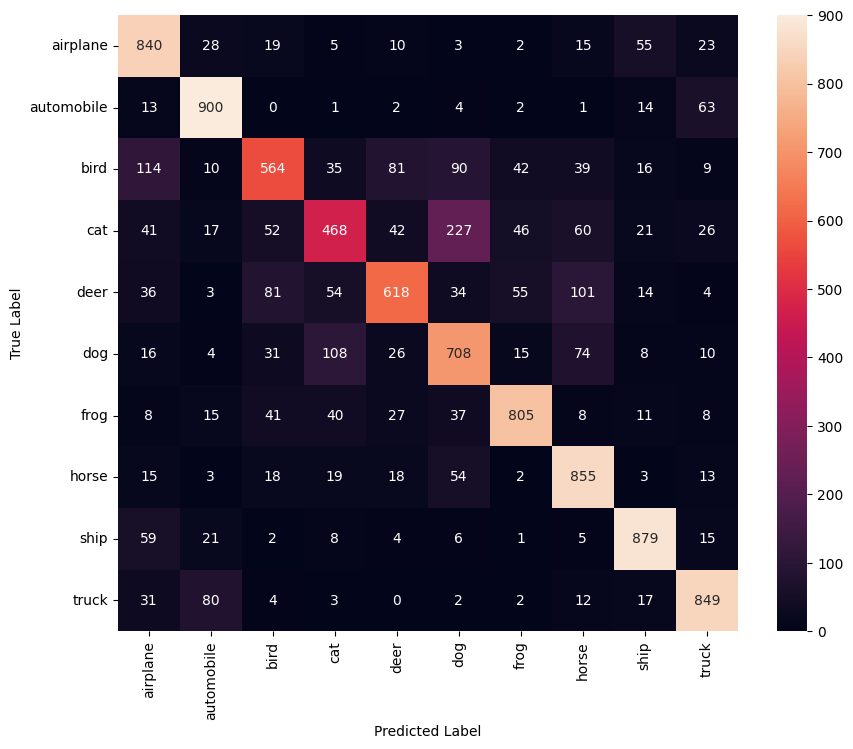

In [20]:
cm_cnn = metrics.confusion_matrix(y_test, y_pred_cnn5)
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(cm_cnn, annot=True, fmt='g', xticklabels=label_names, yticklabels=label_names)
ax.set(ylabel="True Label", xlabel="Predicted Label")
plt.show()

In [21]:
print(metrics.classification_report(y_test, y_pred_cnn5))

              precision    recall  f1-score   support

           0       0.72      0.84      0.77      1000
           1       0.83      0.90      0.86      1000
           2       0.69      0.56      0.62      1000
           3       0.63      0.47      0.54      1000
           4       0.75      0.62      0.68      1000
           5       0.61      0.71      0.65      1000
           6       0.83      0.81      0.82      1000
           7       0.73      0.85      0.79      1000
           8       0.85      0.88      0.86      1000
           9       0.83      0.85      0.84      1000

    accuracy                           0.75     10000
   macro avg       0.75      0.75      0.74     10000
weighted avg       0.75      0.75      0.74     10000



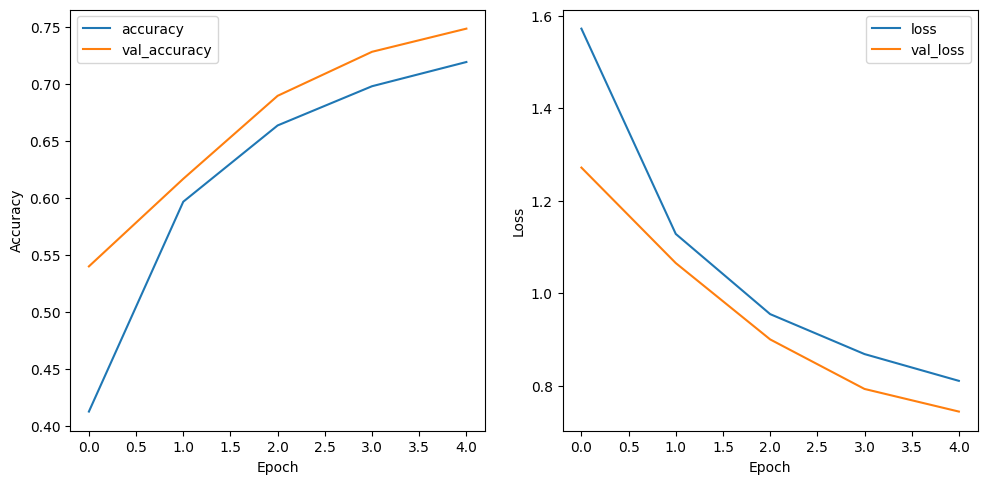

In [22]:
fig = plt.figure(figsize=(10, 5))
axes1 = fig.add_subplot(1,2,1)
axes2 = fig.add_subplot(1,2,2)
axes1.set(xlabel = 'Epoch', ylabel = 'Accuracy')
axes2.set(xlabel = 'Epoch', ylabel = 'Loss')
fig.tight_layout()
axes1.plot(run_cnn5.history['accuracy'], label='accuracy')
axes1.plot(run_cnn5.history['val_accuracy'], label='val_accuracy')
axes1.legend()
axes2.plot(run_cnn5.history['loss'], label='loss')
axes2.plot(run_cnn5.history['val_loss'], label='val_loss')
axes2.legend()
plt.show()

<b> Observation: The cnn model performs quite well with improved recall and precisions across all the classes. Cat-dog-deer-bird are still the most confused classes but significant true classification is achieved across the diagonal of the confusion matrix. Moreover, the val-accuracy and val_loss curves show significant improvements as more epochs are run, and show potential improvement (not yet plateu) if more epochs are run.

In [23]:
cnn5.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 50)        1400      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        28864     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 8, 8, 128)         0

Generate a random image from training set:

In [33]:
from PIL import Image

8777


Text(0.5, 0, 'airplane-[0]')

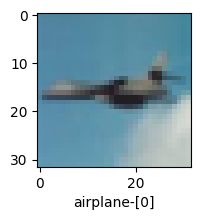

In [39]:
i = np.random.randint(len(test_images))
print(i)
plt.figure(figsize=(10,2))
plt.imshow(test_images[i])
plt.xlabel(label_names[int(test_labels[i])] + "-" + str(test_labels[i]))


Pass the image array to the model for prediction

In [40]:
image = x_test[i]
print(image.shape)
result = cnn5.predict(image.reshape(1,32,32,3))
print(result)
print(label_names[np.argmax(result)])

(32, 32, 3)
[[9.7909743e-01 1.9577092e-05 1.3614256e-03 3.2661922e-06 7.3834424e-05
  1.8172224e-07 8.5703596e-07 9.3790965e-07 1.9413525e-02 2.8970726e-05]]
airplane


Export the image array to .jpg file

In [41]:
from PIL import Image
im = Image.fromarray(test_images[i])
im.save(f"img-{i}.jpeg")

Test codes: Reimport the image file and pass again into the model for prediction

In [42]:
photo = 'img-' + str(i) + '.jpeg'

img = Image.open(photo)
image_array = np.array(img)

result = cnn5.predict(image_array.reshape(1,32,32,3))
print(result)
print(label_names[np.argmax(result)])

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
airplane


ref:
- https://medium.com/@baraaalbourghli/deploy-your-keras-or-tensorflow-machine-learning-model-to-aws-using-amazon-sagemaker-how-to-2d88a6e779cc

In [ ]:
cnn5.save_weights('cnn5_model_weights.h5')
model_json = cnn5.to_json()
with open("cnn5_model.json", "w") as json_file:
    json_file.write(model_json)